Выполнил: Николаев Сергей, студент 517 группы

# Постановка задачи

Параметр распределения Бернулли **p** оценивают с помощью выборочного среднего $S_{n} = \frac{1}{n}\sum_{i=1}^{n}X_{i}$. Достаточно ли 10000 испытаний, чтобы оценить параметр с точностью $\pm0.01$ с вероятностью 99%?
То есть необходимо проверить следующее неравенство:
$$\mathbb{P}\left(-0.01 \le \frac{\sum_{i=1}^{n}X_{i} - np}{n} \le 0.01 \right) \geq 0.99, \;n = 10000
$$

# Решение

Воспользуемся теоремой Муавра-Лапласа, из которой следует:
$$\frac{\sum_{i=1}^{n}X_{i} - np}{\sqrt{np(1-p)}} \stackrel{по\;распределению}{\to} \mathcal{N}(0,1), \; n \to \infty$$
Согласно определению сходимости по распределению:
$$\forall a,b\in \mathbb{R},\; a \lt b,\; \Rightarrow  \lim\limits_{n\to \infty}\mathbb{P}\left(a \le \frac{\sum_{i=1}^{n}X_{i} - np}{\sqrt{np(1-p)}} \le b \right) = \int\limits_{a}^b \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\, dx $$

Тогда 
$$\mathbb{P}\left(a \sqrt{\frac{p(1-p)}{n}} \le \frac{\sum_{i=1}^{n}X_{i} - np}{n} \le b \sqrt{\frac{p(1-p)}{n}} \right) \approx \int\limits_{a}^{b} \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\, dx$$

Положим $b = 0.01 \sqrt{\frac{n}{p(1-p)}}$, $a = -b$:
$$\mathbb{P}\left(-0.01 \le \frac{\sum_{i=1}^{n}X_{i} - np}{n} \le 0.01 \right) \approx \int\limits_{-0.01 \sqrt{\frac{n}{p(1-p)}}}^{0.01 \sqrt{\frac{n}{p(1-p)}}} \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\, dx = F\left(0.01 \sqrt{\frac{n}{p(1-p)}}\right) - F\left(-0.01 \sqrt{\frac{n}{p(1-p)}}\right),$$
где $F\left(t\right) = \int\limits_{-\infty}^{t} \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\, dx$

Данное выражение зависит от **p**, поэтому построим график зависимости вероятности попадания в нужный интервал от параметра распределения Бернулли **p** при разных **n**.

In [32]:
import numpy as np
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

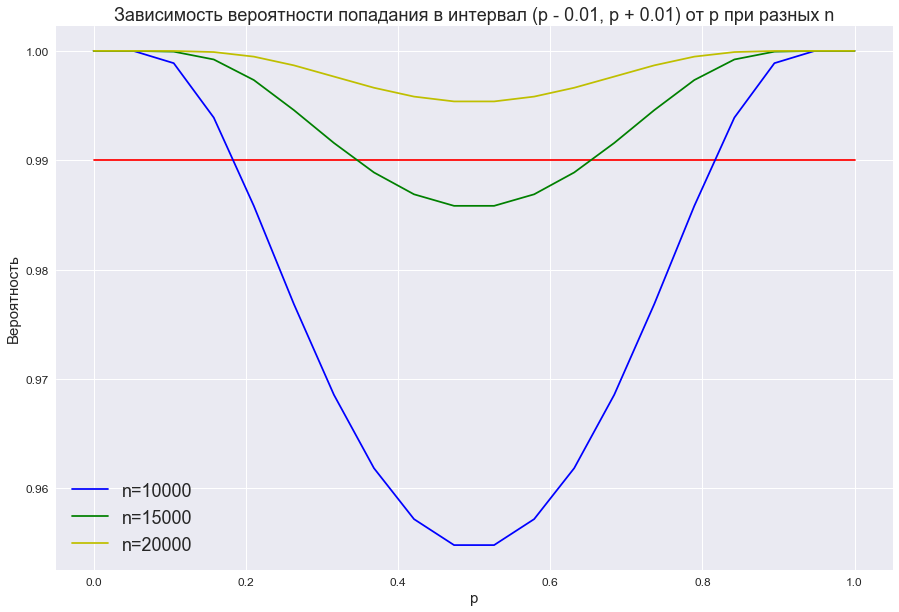

In [46]:
EPS = 10**-5
n_steps = 20
p_grid = np.linspace(0.0 + EPS, 1.0 - EPS, n_steps)

plt.figure(figsize=(15, 10))
plt.rc('font', size=15)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.plot(p_grid, [0.99] * n_steps, c='r')
for n, c in zip([10000, 15000, 20000], ['b', 'g', 'y']):
    args = 0.01 * np.sqrt(n / p_grid / (1.0 - p_grid))
    probs = 2 * norm.cdf(args) - 1
    plt.plot(p_grid, probs, c=c, label='n={}'.format(n))
plt.title('Зависимость вероятности попадания в интервал (p - 0.01, p + 0.01) от p при разных n')
plt.xlabel('p')
plt.ylabel('Вероятность')
plt.legend(fontsize='large')
plt.show()

Из графика видно, что вероятность попадания в интервал $p \pm 0.01$ зависит от значения оцениваемого параметра. Эта вероятность достигает минимума при $p=0.5$ и монотонно возрастает при приближении к границам отрезка $\left[0;1\right]$. Поэтому ответ на поставленный вопрос зависит от значения оцениваемого параметра. При $n=10000$ существенная часть кривой лежит ниже 99%-ой отсечки. Поэтому необходимо повышать **n**. Например, при $n=20000$ вероятность попадания в интервал выше 99% $\forall p$.